In [107]:
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [108]:
#Read the data set
glass=pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA

In [109]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [110]:
glass.shape

(214, 10)

In [111]:
glass.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [112]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [114]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [115]:
glass.tail(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
212,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.0,8.62,1.67,0.0,7


In [116]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Data visualization

<AxesSubplot:xlabel='Type', ylabel='count'>

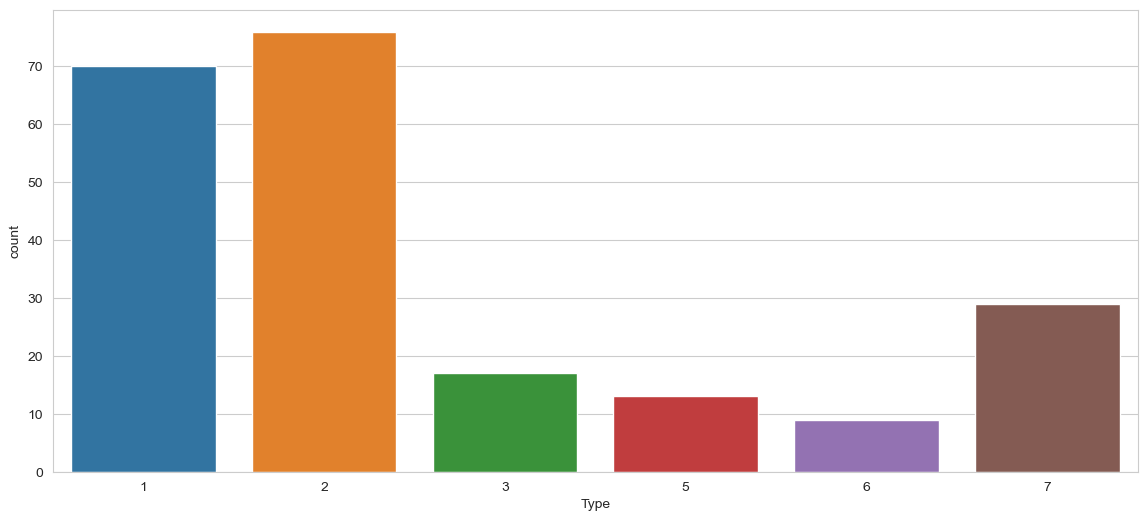

In [117]:
plt.figure(figsize=(14,6))
sns.countplot(x="Type",data=glass)

<AxesSubplot:>

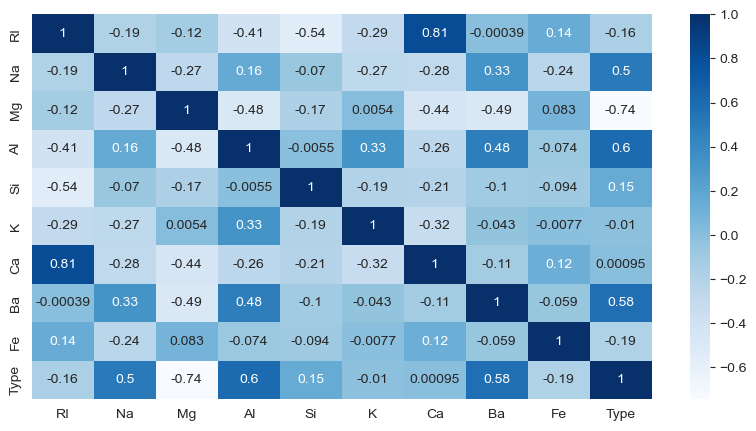

In [118]:
plt.figure(figsize=(10,5))
sns.heatmap(glass.corr(),annot=True,cmap='Blues')

# Scalling

In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
new_features=scaler.fit_transform(glass.iloc[:,:-1])

In [171]:
new_features

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [172]:
x_train,x_test,y_train,y_test=train_test_split(new_features,glass.iloc[:,-1],test_size=0.3)

In [173]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (149, 9)
Shape of x_test:  (65, 9)
Shape of y_train:  (149,)
Shape of y_test:  (65,)


In [123]:
import warnings
warnings.filterwarnings("ignore")

# KNN

In [174]:
l=[]
for k in range(1,40,2):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    l.append(accuracy_score(pred,y_test))

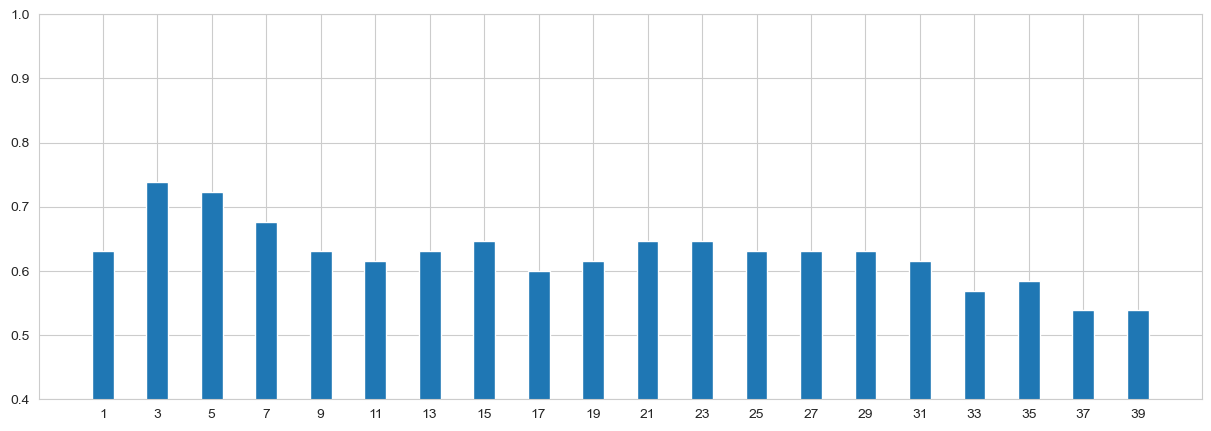

In [175]:
plt.figure(figsize=(15,5))
plt.bar(range(1,40,2),l)
plt.ylim(0.4,1)
plt.xticks(range(1,40,2))
plt.show()

In [176]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)

0.7384615384615385

# Building KNN model

In [177]:
model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [178]:
pred1 = model.predict(x_test)
pred1

array([2, 2, 1, 1, 5, 1, 1, 1, 1, 2, 2, 2, 1, 7, 1, 2, 2, 1, 2, 5, 1, 7,
       1, 7, 2, 1, 1, 7, 1, 6, 1, 2, 6, 1, 2, 1, 5, 2, 1, 2, 1, 7, 1, 2,
       1, 7, 1, 1, 6, 1, 1, 1, 6, 1, 7, 2, 7, 1, 1, 2, 1, 2, 2, 1, 2],
      dtype=int64)

In [180]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred1})
pred_df

,Actual,Predicted
85,2,2
71,2,2
151,3,1
22,1,1
173,5,5
...,...,...
158,3,1
72,2,2
120,2,2
11,1,1


In [181]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results = cross_val_score(model1, x_train, y_train, cv=kfold)
print(results.mean())

0.6038095238095237


In [182]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report ',classification_report(y_test,pred1))

Classification Report                precision    recall  f1-score   support

           1       0.65      0.87      0.74        23
           2       0.84      0.67      0.74        24
           3       0.00      0.00      0.00         4
           5       0.33      1.00      0.50         1
           6       0.75      1.00      0.86         3
           7       1.00      0.80      0.89        10

    accuracy                           0.74        65
   macro avg       0.60      0.72      0.62        65
weighted avg       0.73      0.74      0.72        65



In [183]:
print('Confusion Matrix\n',confusion_matrix(y_test,pred1))

Confusion Matrix
 [[20  3  0  0  0  0]
 [ 7 16  0  1  0  0]
 [ 4  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  1  8]]


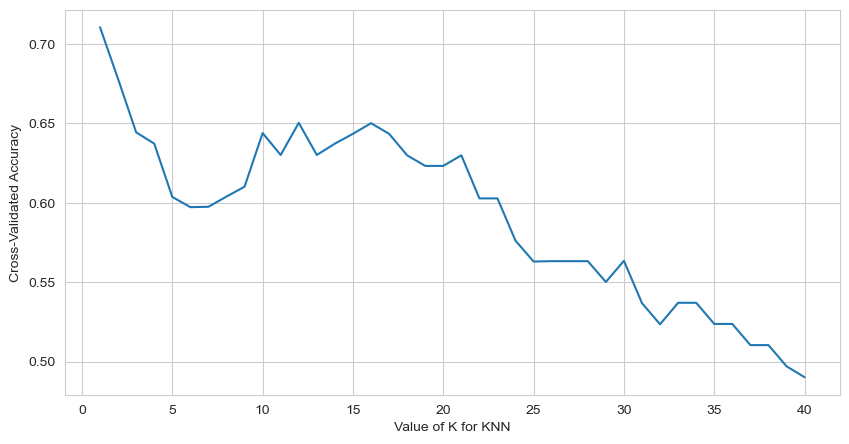

In [184]:
sns.set_style("whitegrid")
k_range = range(1, 41)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [185]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [186]:
pred2=knn.predict(x_test)
pred2

array([2, 2, 1, 3, 5, 1, 3, 1, 3, 2, 1, 1, 1, 7, 1, 2, 2, 7, 2, 5, 1, 7,
       3, 7, 2, 2, 1, 7, 2, 6, 3, 2, 6, 1, 2, 1, 5, 2, 1, 2, 1, 7, 1, 1,
       1, 7, 1, 2, 6, 1, 1, 1, 6, 1, 7, 2, 7, 1, 1, 2, 2, 2, 2, 1, 2],
      dtype=int64)

In [187]:
kfold = KFold(n_splits=10)
results = cross_val_score(knn, x_train, y_train, cv=kfold)
print(results.mean())

0.7042857142857143


In [188]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report ',classification_report(y_test,pred2))

Classification Report                precision    recall  f1-score   support

           1       0.62      0.65      0.64        23
           2       0.65      0.54      0.59        24
           3       0.20      0.25      0.22         4
           5       0.33      1.00      0.50         1
           6       0.75      1.00      0.86         3
           7       0.89      0.80      0.84        10

    accuracy                           0.63        65
   macro avg       0.57      0.71      0.61        65
weighted avg       0.65      0.63      0.63        65

